<a href="https://colab.research.google.com/github/bojaruniec/ksi_dokt/blob/master/QFT_and_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arkusz przygotowano na podstawie https://pennylane.ai/qml/demos/tutorial_qft_arithmetics/

## Instalacja niezbędnych pakietów na środowisku Colab

In [ ]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install -q qiskit_aer
!pip install -q qiskit_ibm_runtime

## Import bibliotek

In [2]:
# Imports from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import GroverOperator, MCMT, ZGate, XGate
from qiskit.circuit.library import HGate, YGate, RZGate
from qiskit.circuit.library import QFT, DraperQFTAdder
from qiskit.visualization import plot_distribution
import qiskit.quantum_info as qi
import numpy as np

Na podstawie https://pennylane.ai/qml/demos/tutorial_qft_arithmetics/

# Zapisenie liczb w transformacji QFT

In [3]:
def f_obwod_i_stan(n, number_of_bits = None, name='q', display_steps = False):
  """
  Dla dowolnej liczby w zapisie dziesiętnym przygotowuje liczbę w
  rejestrze kwantowym.

  Wyświetla sfery Blocha oraz schemat obwodu.
  """
  n_bit: str = f'{n:b}' # zapis liczby w postaci binarnej

  if number_of_bits is None:
    number_of_bits = n.bit_length()

  qr = QuantumRegister(number_of_bits, name = name)
  qc = QuantumCircuit(qr)
  qc.reset(range(number_of_bits)) # wprowadź w stan 0
  for pos, bit in enumerate(n_bit[::-1]):
    if bit == '1':
      qc.x(pos)

  if display_steps:
    print(f'Liczba {n} wymaga zapisania na {n.bit_length()} bitach klasycznych.' )
    print('Diagram obwodu')
    display(qc.draw('mpl', style = 'textbook'))
    ψ = qi.Statevector(qc)
    display(ψ.draw('latex'))
    display(ψ.draw('Bloch'))
  return qc



In [4]:
qc_06 = f_obwod_i_stan(6, display_steps = True)

Liczba 6 wymaga zapisania na 3 bitach klasycznych.
Diagram obwodu


<IPython.core.display.Latex object>

Liczba 37 wymaga zapisania na 6 bitach klasycznych.
Diagram obwodu


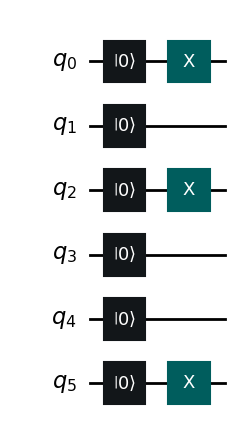

<IPython.core.display.Latex object>

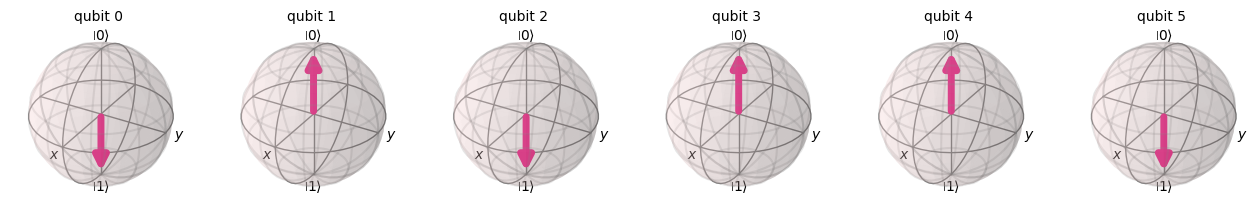

In [5]:
qc_37 = f_obwod_i_stan(37, display_steps = True)

In [6]:
def f_dodaj_do_obwodu_qft(qc, display_steps = True):
  """
  Dodaje QFT do istniejącego obwodu dla wszystkich kubitów,
  zwraca obwód z dodanym QFT,
  wyświetla obwód i sferę Blocha
  """
  qc.append(QFT(qc.num_qubits), range(qc.num_qubits))

  if display_steps:
    display(qc.draw('mpl', style = 'textbook'))
    ψ = qi.Statevector(qc)
    display(ψ.draw('latex'))
    display(ψ.draw('Bloch'))
  return qc



<IPython.core.display.Latex object>

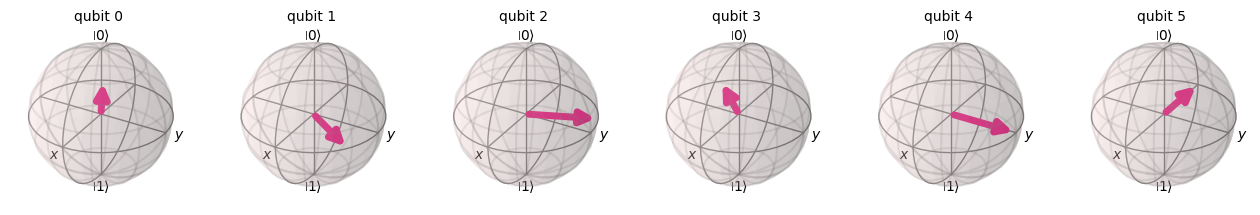

In [7]:
qc_37_qft = f_dodaj_do_obwodu_qft(qc_37)

# Jak wyglądają liczby od 1 do 10 zapisane w bazie QFT

Wraz ze wzrotem liczby o 1:
1. Na qubicie 0 nastepuje obrót o 22,5 stopnia ($\frac{\pi}{8}$)
1. Na qubicie 1 następuje obrót o 45 stopni ($\frac{\pi}{4}$)
1. Na qubicie 1 następuje obrót o 90 stopni ($\frac{\pi}{2}$)
1. Na qubicie 3 następuje obrót o 180 stopni ($\pi$)

0


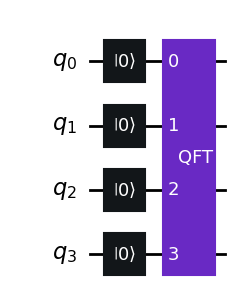

<IPython.core.display.Latex object>

1


<IPython.core.display.Latex object>

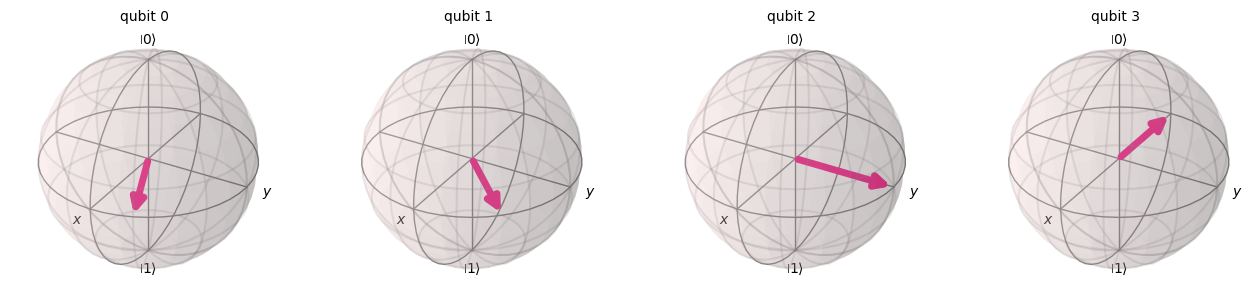

2


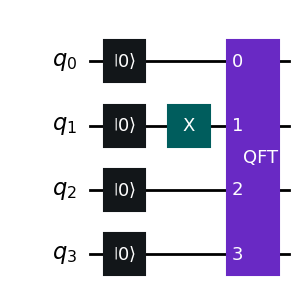

<IPython.core.display.Latex object>

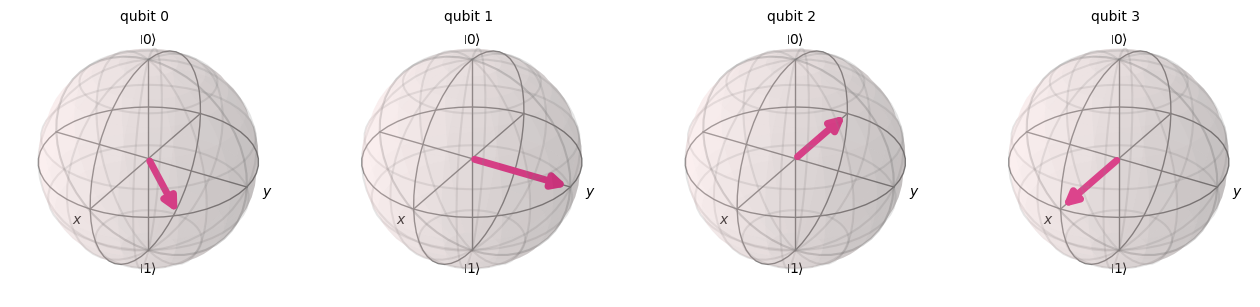

3


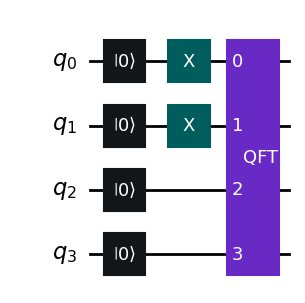

<IPython.core.display.Latex object>

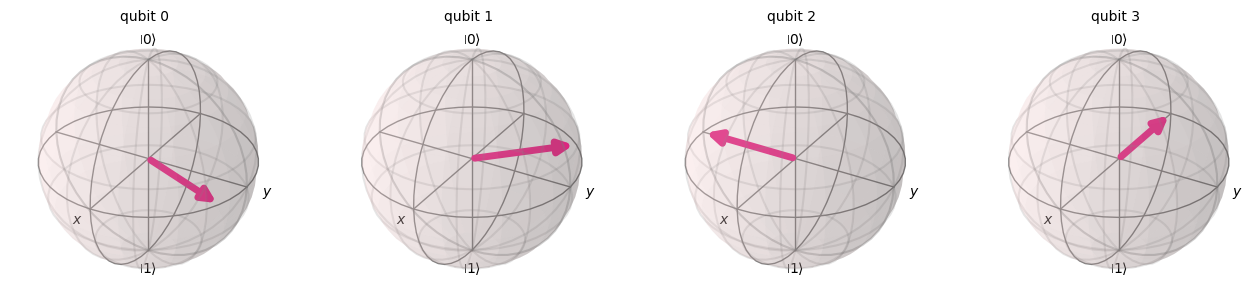

4


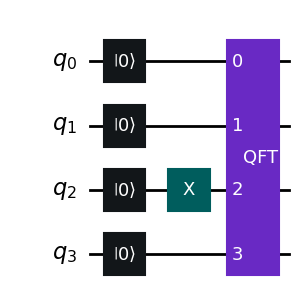

<IPython.core.display.Latex object>

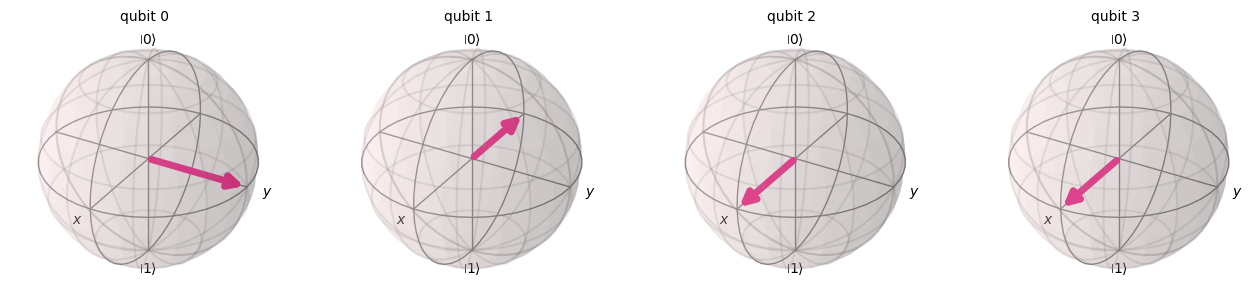

5


<IPython.core.display.Latex object>

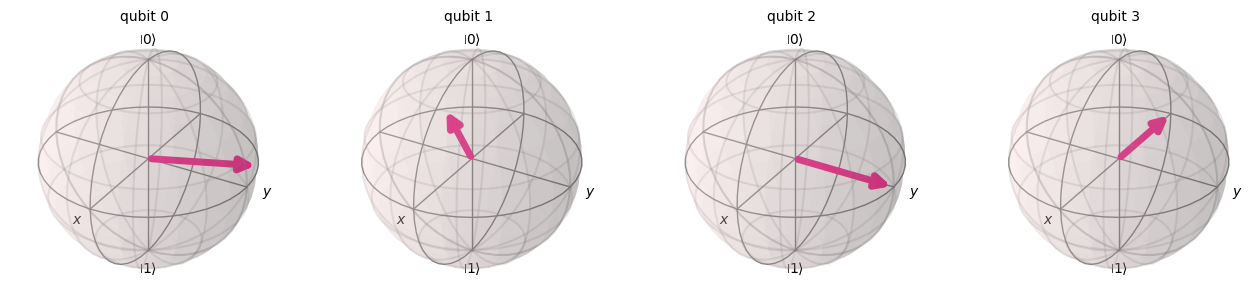

6


<IPython.core.display.Latex object>

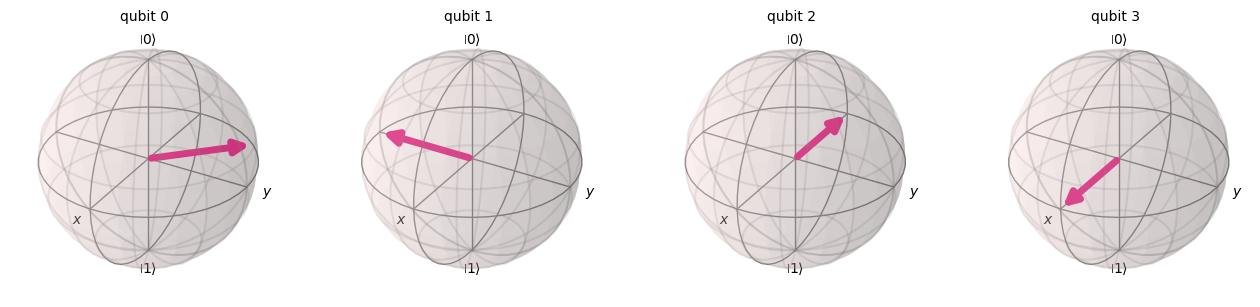

7


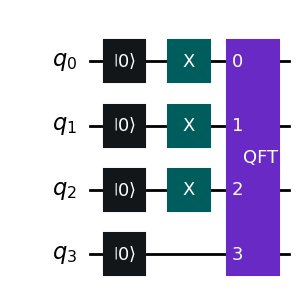

<IPython.core.display.Latex object>

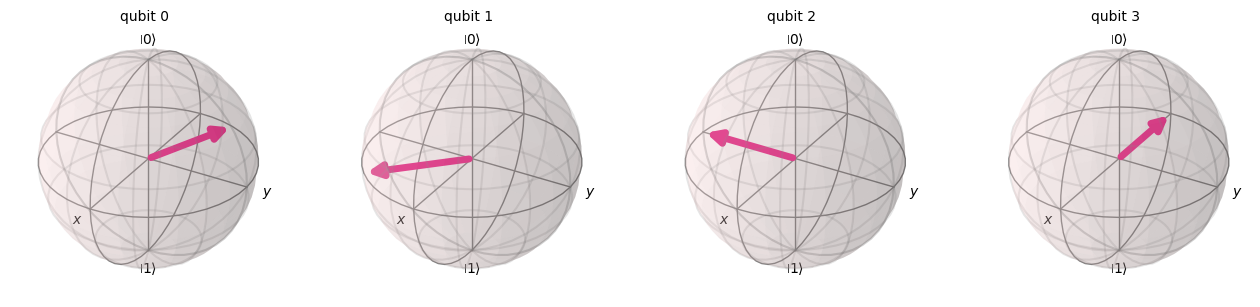

8


<IPython.core.display.Latex object>

9


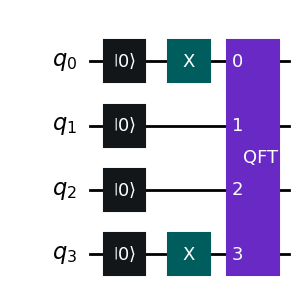

<IPython.core.display.Latex object>

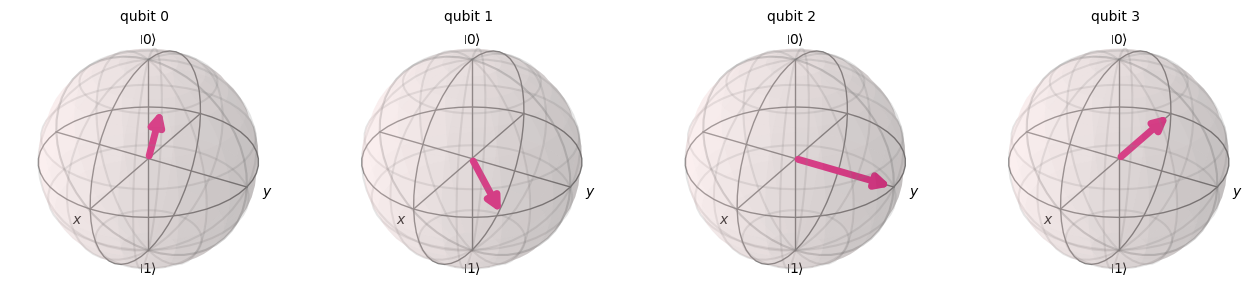

10


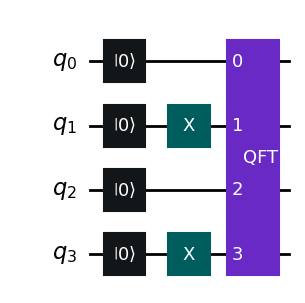

<IPython.core.display.Latex object>

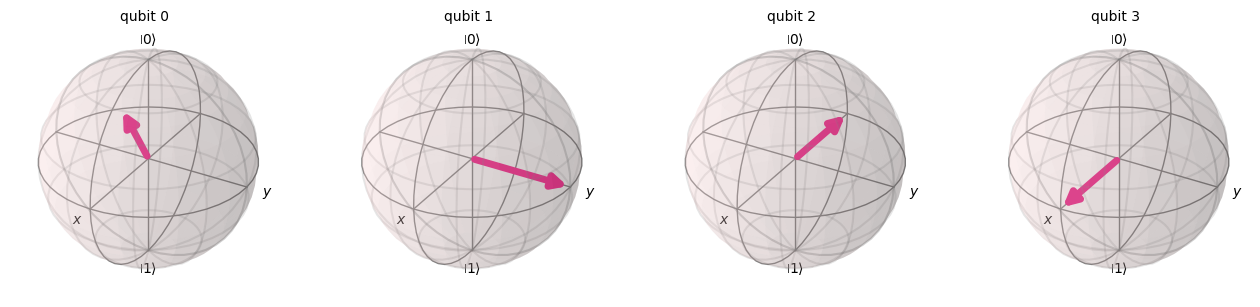

In [8]:
for i in range(0,11,1):
  qc = f_obwod_i_stan(i, number_of_bits = 4, display_steps = False)
  print(i)
  qc = f_dodaj_do_obwodu_qft(qc, display_steps = True)

W systemie n-kubitowym, dodanie liczby $|1\rangle$ będzie powodowało obrót j-tego kubita, gdzie kubit 0 jest najmniej znaczącym, o:

$\alpha_j= \frac{2 \cdot 1
\cdot \pi}{2^{n-j}}$

Dla przykładu z $n=4$:

1. $\alpha_0= \frac{2\pi}{2^{4-0}} = \frac{2\pi}{2^{4}} = \frac{\pi}{8}$
1. $\alpha_1= \frac{2\pi}{2^{4-1}} = \frac{2\pi}{2^{3}} = \frac{\pi}{4}$
1. $\alpha_2= \frac{2\pi}{2^{4-2}} = \frac{2\pi}{2^{2}} = \frac{\pi}{2}$
1. $\alpha_3= \frac{2\pi}{2^{4-3}} = \frac{2\pi}{2^{1}} = {\pi}$


## Wzór na obliczenie kąta

Liczba $|m⟩$ będzie reprezentowana w bazie QFT z kątami na poszczególnych kubitach:

$\alpha_j= \frac{ 2 \cdot m \cdot \pi}{2^{n-j}}$

Np, w systemie $n=4$ kubitowym liczba $|2⟩$ będzie miała kąty:

1. $\alpha_0= \frac{2 \cdot 2\pi}{2^{4-0}} = \frac{2 \cdot \pi}{2^{3}} = \frac{\pi}{4}$
1. $\alpha_1= \frac{2 \cdot 2\pi}{2^{4-1}} = \frac{2 \cdot \pi}{2^{2}} = \frac{\pi}{2}$
1. $\alpha_2= \frac{2 \cdot 2\pi}{2^{4-2}} = \frac{2 \cdot \pi}{2^{1}} = {\pi}$
1. $\alpha_3= \frac{2 \cdot 2\pi}{2^{4-3}} = \frac{2 \cdot \pi}{2^{0}} = {2 \cdot \pi}$ = 0



# Dodanie liczby stałej do stanu w bazie QFT
Dodanie liczby do stanu będzie obywało się poprzez wykonanie obrotów Rz na poszczególnych kubitach o kąty obliczone zgodnie z wzorami powyżej

## Przykład dodawania liczb 3 i 4

### Inicjalizacja składnika 1 - liczba 3

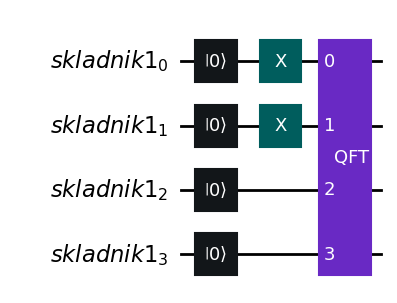

<IPython.core.display.Latex object>

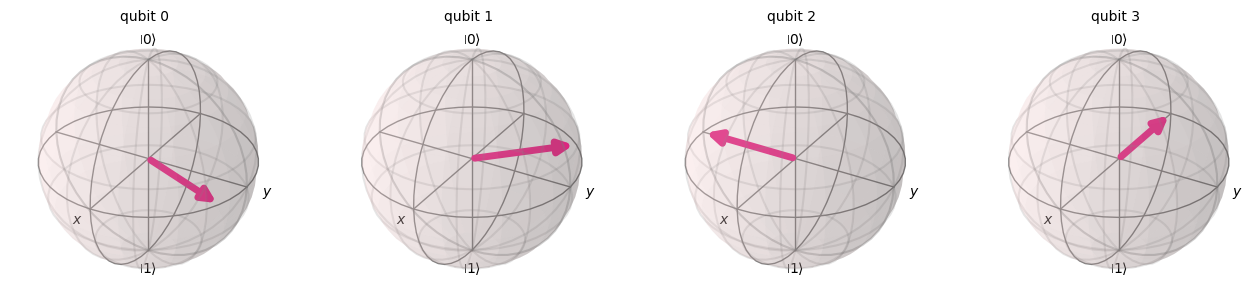

In [9]:
skladnik1 = 3
qc_skladnik1 = f_obwod_i_stan(skladnik1, name='skladnik1', number_of_bits = 4, display_steps = False)
qc_skladnik1 = f_dodaj_do_obwodu_qft(qc_skladnik1, display_steps = True)

Dodanie liczby 4 w 4-kubitowym systemie, to wykonanie dodatkowych obrotów o kąty, dla kubitów:

1. qubit 0 $α_0 = \frac{2 \cdot 4 \cdot π}{2 ^ {4-0}} = \frac{2^3 \cdot π}{2 ^ 4} = \frac{\pi}{2}$

1. qubit 1 $α_1 = \frac{2 \cdot 4 \cdot π}{2 ^ {4-1}} = \frac{2^3 \cdot π}{2 ^ 3} =  \pi $

1. qubit 2 $α_2 = \frac{2 \cdot 4 \cdot π}{2 ^ {4-2}} = \frac{2^3 \cdot π}{2 ^ 2} = 2\pi = 0$

1. qubit 3 $α_3 = \frac{2 \cdot 4 \cdot π}{2 ^ {4-3}} = \frac{2^3 \cdot π}{2 ^ 1} = 4\pi = 0$


In [10]:
import numpy as np

przed obrotem


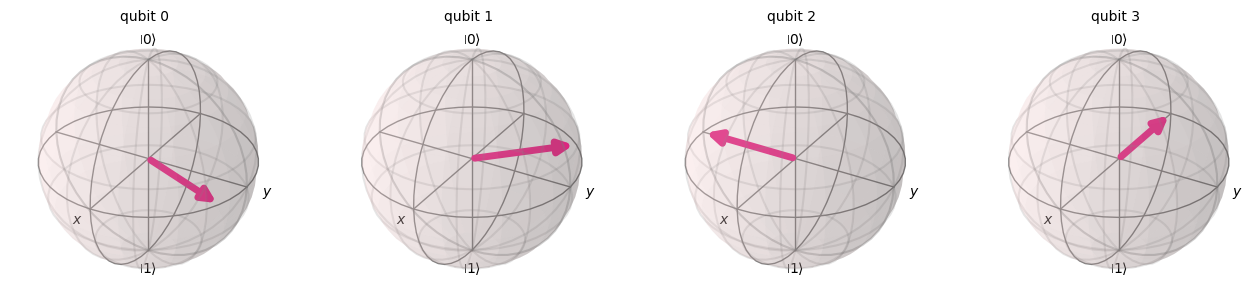

po obrocie


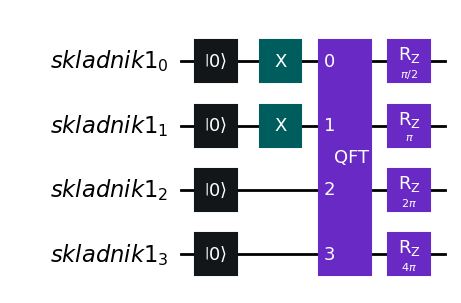

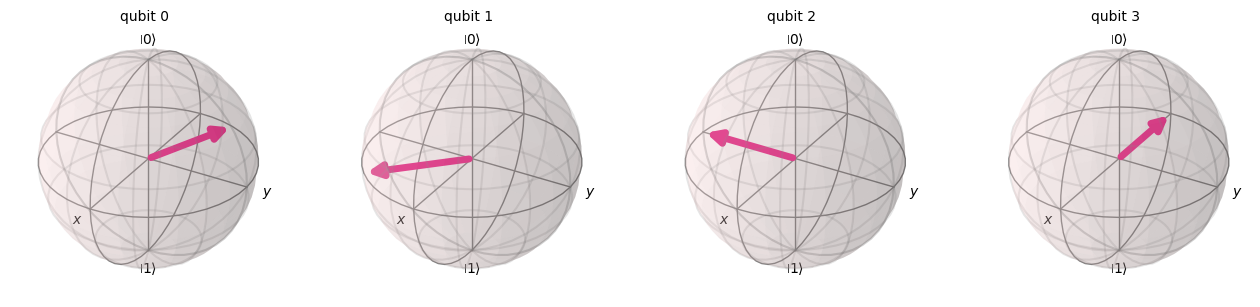

In [11]:
qc_dzialanie = qc_skladnik1.copy() # skopiowanie obwodu
qc_dzialanie.rz(np.pi/2, 0)
qc_dzialanie.rz(np.pi, 1)
qc_dzialanie.rz(2*np.pi, 2)
qc_dzialanie.rz(4*np.pi, 3)
qc_dzialanie.draw('mpl')

print('przed obrotem')
ψ1 = qi.Statevector(qc_skladnik1)
display(ψ1.draw('Bloch'))

print('po obrocie')
display(qc_dzialanie.draw('mpl', style = 'textbook'))
ψ2 = qi.Statevector(qc_dzialanie)
display(ψ2.draw('Bloch'))

### Odwrócenie działania QFT

po dodaniu inv QFT


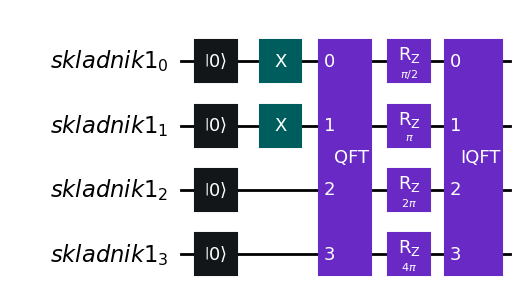

In [12]:
qc_dzialanie.append(QFT(qc_dzialanie.num_qubits).inverse(), range(qc_dzialanie.num_qubits))

print('po dodaniu inv QFT')
display(qc_dzialanie.draw('mpl', style = 'textbook'))
ψ3 = qi.Statevector(qc_dzialanie)
display(ψ3.draw('Bloch'))


Po transformacji odczytany wektor to:

In [13]:
ψ3.draw('latex')

<IPython.core.display.Latex object>

wektor ten w zapisie dziesiętym to:

In [14]:
ψ3.sample_counts(1)

{'0111': 1}

In [15]:
dic_out = dict(ψ3.sample_counts(1000))
print(f'Wynik dodawania to {int(tuple(dic_out)[0],2)}')

Wynik dodawania to 7


# Dodawanie liczb w dwóch rejestrach

In [16]:
qc_qft_example = QuantumCircuit(4)
qc_qft_example.reset(range(4))
display(qc_qft_example.draw())

q_0: ─|0>─
          
q_1: ─|0>─
          
q_2: ─|0>─
          
q_3: ─|0>─

## Sprawdzenie, jak wykonać kontrolowany QFT dla rejestru 2-kubitowego

W systemie 4-kubitowym kopiowany jest stan kubitu za pomocą bramki controlled-Z i odczytywany przy pomocy funkcji odwrotej dla transformacji Fouriera.

### dla liczby 1

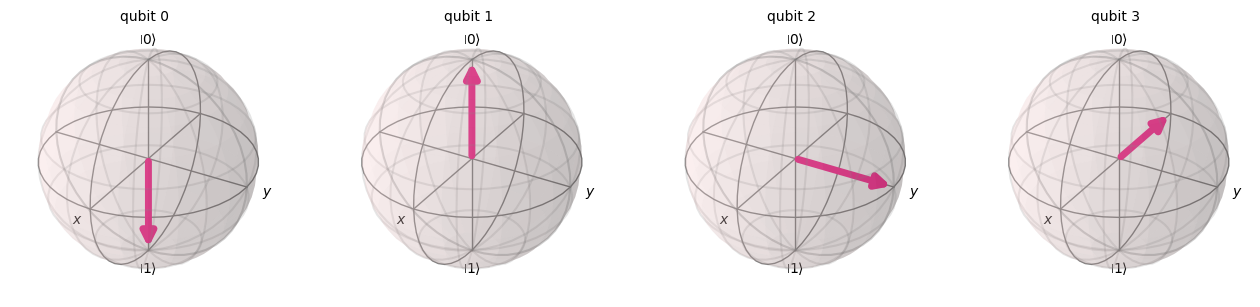

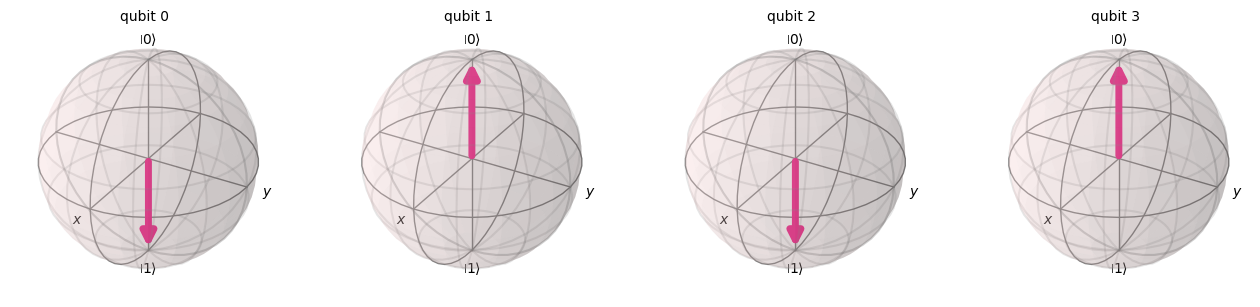

<IPython.core.display.Latex object>

In [17]:
qc_01 = qc_qft_example.copy()
qc_01.x(0)
qc_01.h([2,3])

ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))


qc_01.crz((2 * 1 * np.pi) / 2**(2-0), 0, 2)
qc_01.crz((2 * 1 * np.pi) / 2**(2-1), 0, 3)

ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))

qc_01 = qc_01.compose(QFT(2).inverse(), [2,3])
display(qc_01.draw('mpl'))

ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))
display(ψ01.draw('latex'))

Ostatnie dwa kubity są równe pierwszym dwóm, a więc działanie zostało wykonane poprawnie


### dla liczby 2

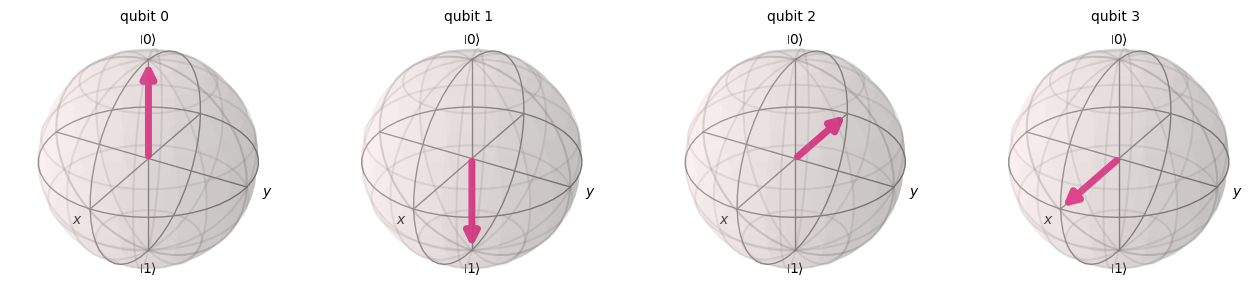

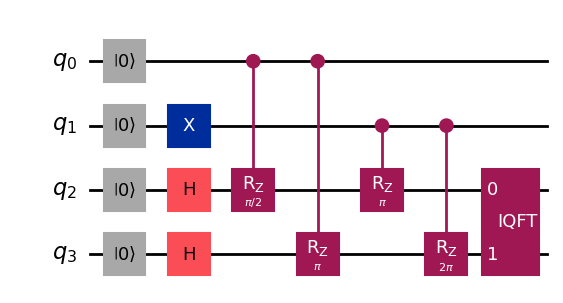

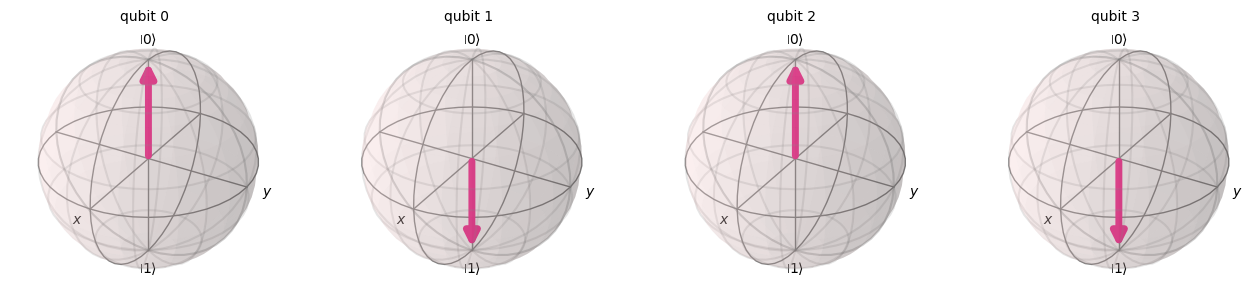

<IPython.core.display.Latex object>

In [18]:
qc_01 = qc_qft_example.copy()
qc_01.x(1)
qc_01.h([2,3])

ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))


qc_01.crz((2 * 1  * np.pi) / 2**(2-0), 0, 2)
qc_01.crz((2 * 1  * np.pi) / 2**(2-1), 0, 3)

qc_01.crz((2 * 2  * np.pi) / 2**(2-0), 1, 2)
qc_01.crz((2 * 2  * np.pi) / 2**(2-1), 1, 3)


ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))

qc_01 = qc_01.compose(QFT(2).inverse(), [2,3])
display(qc_01.draw('mpl'))

ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))
display(ψ01.draw('latex'))

j.w. - ostatnie dwa kubity równe dwóm pierwszym, a więc działanie wykonane poprawnie

### dla liczby 3

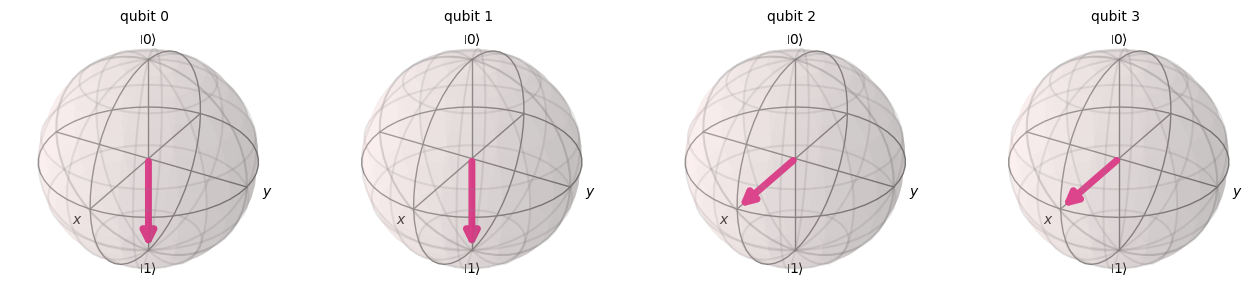

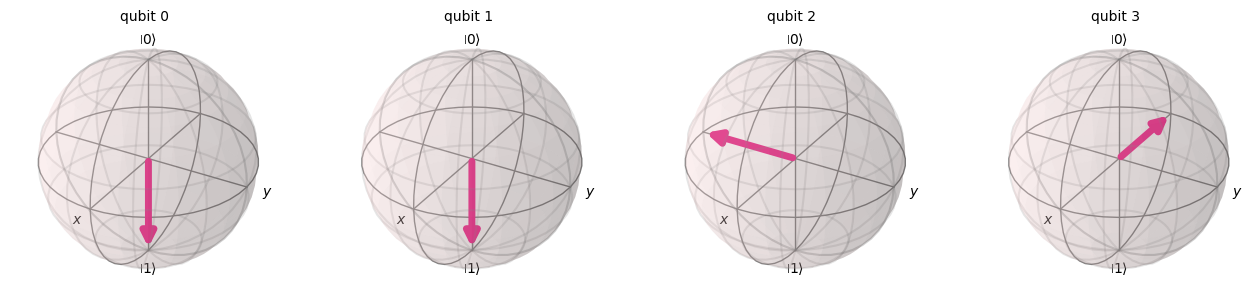

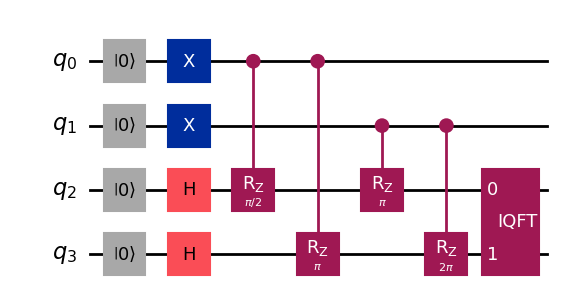

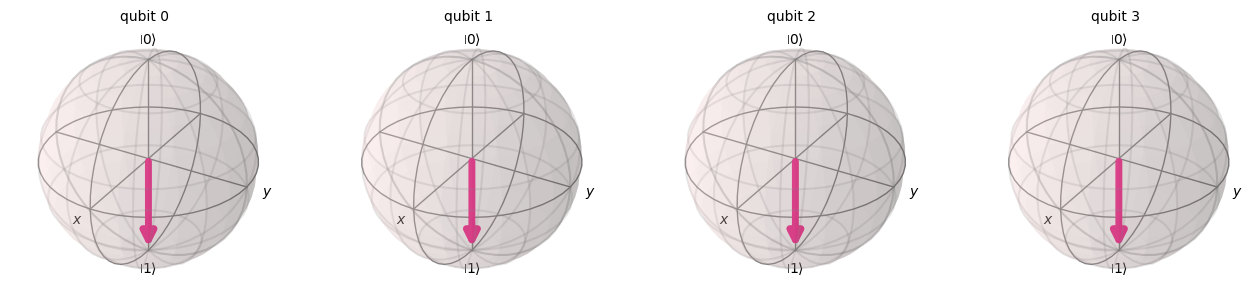

<IPython.core.display.Latex object>

In [19]:
liczba = 3

qc_01 = qc_qft_example.copy()
qc_01.x(0)
qc_01.x(1)
qc_01.h([2,3])

ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))


qc_01.crz((2 * 1  * np.pi) / 2**(2-0), 0, 2)
qc_01.crz((2 * 1  * np.pi) / 2**(2-1), 0, 3)

qc_01.crz((2 * 2  * np.pi) / 2**(2-0), 1, 2)
qc_01.crz((2 * 2  * np.pi) / 2**(2-1), 1, 3)


ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))

qc_01 = qc_01.compose(QFT(2).inverse(), [2,3])
display(qc_01.draw('mpl'))

ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))
display(ψ01.draw('latex'))

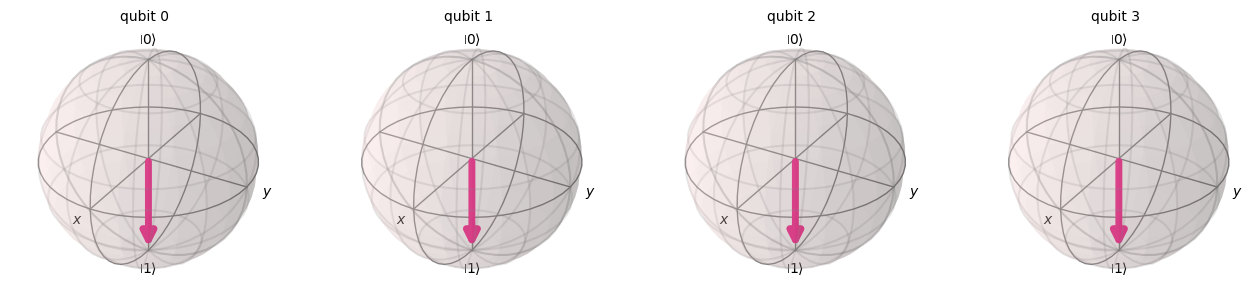

<IPython.core.display.Latex object>

In [20]:
ψ01 = qi.Statevector(qc_01)
display(ψ01.draw('Bloch'))
display(ψ01.draw('latex'))


## Funkcja do kopiowania w QFT dla dowolnej liczby

QFT dla liczby 4


░                                ░ »
a_0: ──────────■──────────■─────────■─────░────────────────────────────────░─»
               │          │         │     ░                                ░ »
a_1: ──────────┼──────────┼─────────┼─────░──────■─────────■────────■──────░─»
     ┌───┐     │          │         │     ░      │         │        │      ░ »
a_2: ┤ X ├─────┼──────────┼─────────┼─────░──────┼─────────┼────────┼──────░─»
     ├───┤┌────┴────┐     │         │     ░ ┌────┴────┐    │        │      ░ »
b_0: ┤ H ├┤ Rz(π/4) ├─────┼─────────┼─────░─┤ Rz(π/2) ├────┼────────┼──────░─»
     ├───┤└─────────┘┌────┴────┐    │     ░ └─────────┘┌───┴───┐    │      ░ »
b_1: ┤ H ├───────────┤ Rz(π/2) ├────┼─────░────────────┤ Rz(π) ├────┼──────░─»
     ├───┤           └─────────┘┌───┴───┐ ░            └───────┘┌───┴────┐ ░ »
b_2: ┤ H ├──────────────────────┤ Rz(π) ├─░─────────────────────┤ Rz(2π) ├─░─»
     └───┘                      └───────┘ ░                     └────────┘ ░ »
«                                   ░          
«a_0: ──────────────────────────────░──────────
«                                   ░          
«a_1: ──────────────────────────────░──────────
«                                   ░          
«a_2: ────■────────■─────────■──────░──────────
«     ┌───┴───┐    │         │      ░ ┌───────┐
«b_0: ┤ Rz(π) ├────┼─────────┼──────░─┤0      ├
«     └───────┘┌───┴────┐    │      ░ │       │
«b_1: ─────────┤ Rz(2π) ├────┼──────░─┤1 IQFT ├
«              └────────┘┌───┴────┐ ░ │       │
«b_2: ───────────────────┤ Rz(4π) ├─░─┤2      ├
«                        └────────┘ ░ └───────┘

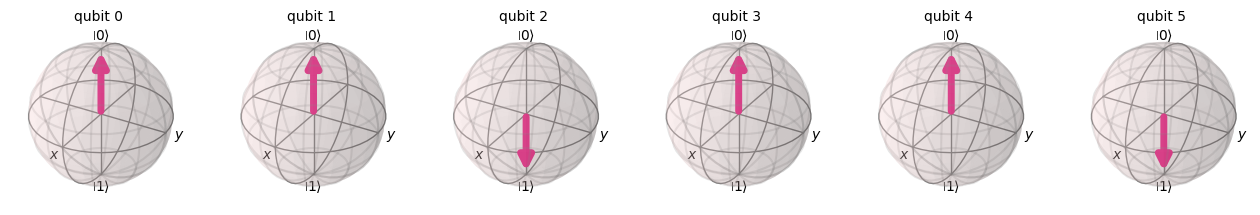

<IPython.core.display.Latex object>

QFT dla liczby 5


┌───┐                                ░                                ░ »
a_0: ┤ X ├─────■──────────■─────────■─────░────────────────────────────────░─»
     └───┘     │          │         │     ░                                ░ »
a_1: ──────────┼──────────┼─────────┼─────░──────■─────────■────────■──────░─»
     ┌───┐     │          │         │     ░      │         │        │      ░ »
a_2: ┤ X ├─────┼──────────┼─────────┼─────░──────┼─────────┼────────┼──────░─»
     ├───┤┌────┴────┐     │         │     ░ ┌────┴────┐    │        │      ░ »
b_0: ┤ H ├┤ Rz(π/4) ├─────┼─────────┼─────░─┤ Rz(π/2) ├────┼────────┼──────░─»
     ├───┤└─────────┘┌────┴────┐    │     ░ └─────────┘┌───┴───┐    │      ░ »
b_1: ┤ H ├───────────┤ Rz(π/2) ├────┼─────░────────────┤ Rz(π) ├────┼──────░─»
     ├───┤           └─────────┘┌───┴───┐ ░            └───────┘┌───┴────┐ ░ »
b_2: ┤ H ├──────────────────────┤ Rz(π) ├─░─────────────────────┤ Rz(2π) ├─░─»
     └───┘                      └───────┘ ░                     └────────┘ ░ »
«                                   ░          
«a_0: ──────────────────────────────░──────────
«                                   ░          
«a_1: ──────────────────────────────░──────────
«                                   ░          
«a_2: ────■────────■─────────■──────░──────────
«     ┌───┴───┐    │         │      ░ ┌───────┐
«b_0: ┤ Rz(π) ├────┼─────────┼──────░─┤0      ├
«     └───────┘┌───┴────┐    │      ░ │       │
«b_1: ─────────┤ Rz(2π) ├────┼──────░─┤1 IQFT ├
«              └────────┘┌───┴────┐ ░ │       │
«b_2: ───────────────────┤ Rz(4π) ├─░─┤2      ├
«                        └────────┘ ░ └───────┘

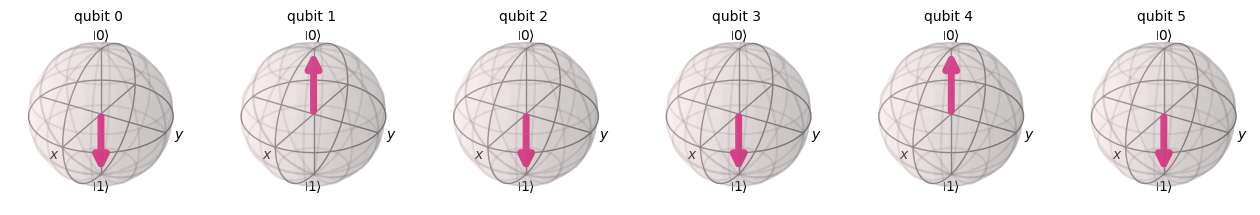

<IPython.core.display.Latex object>

QFT dla liczby 6


░                                ░ »
a_0: ──────────■──────────■─────────■─────░────────────────────────────────░─»
     ┌───┐     │          │         │     ░                                ░ »
a_1: ┤ X ├─────┼──────────┼─────────┼─────░──────■─────────■────────■──────░─»
     ├───┤     │          │         │     ░      │         │        │      ░ »
a_2: ┤ X ├─────┼──────────┼─────────┼─────░──────┼─────────┼────────┼──────░─»
     ├───┤┌────┴────┐     │         │     ░ ┌────┴────┐    │        │      ░ »
b_0: ┤ H ├┤ Rz(π/4) ├─────┼─────────┼─────░─┤ Rz(π/2) ├────┼────────┼──────░─»
     ├───┤└─────────┘┌────┴────┐    │     ░ └─────────┘┌───┴───┐    │      ░ »
b_1: ┤ H ├───────────┤ Rz(π/2) ├────┼─────░────────────┤ Rz(π) ├────┼──────░─»
     ├───┤           └─────────┘┌───┴───┐ ░            └───────┘┌───┴────┐ ░ »
b_2: ┤ H ├──────────────────────┤ Rz(π) ├─░─────────────────────┤ Rz(2π) ├─░─»
     └───┘                      └───────┘ ░                     └────────┘ ░ »
«                                   ░          
«a_0: ──────────────────────────────░──────────
«                                   ░          
«a_1: ──────────────────────────────░──────────
«                                   ░          
«a_2: ────■────────■─────────■──────░──────────
«     ┌───┴───┐    │         │      ░ ┌───────┐
«b_0: ┤ Rz(π) ├────┼─────────┼──────░─┤0      ├
«     └───────┘┌───┴────┐    │      ░ │       │
«b_1: ─────────┤ Rz(2π) ├────┼──────░─┤1 IQFT ├
«              └────────┘┌───┴────┐ ░ │       │
«b_2: ───────────────────┤ Rz(4π) ├─░─┤2      ├
«                        └────────┘ ░ └───────┘

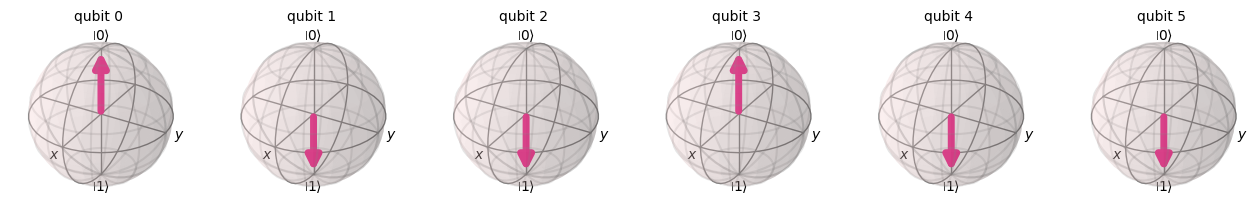

<IPython.core.display.Latex object>

QFT dla liczby 7


┌───┐                                ░                                ░ »
a_0: ┤ X ├─────■──────────■─────────■─────░────────────────────────────────░─»
     ├───┤     │          │         │     ░                                ░ »
a_1: ┤ X ├─────┼──────────┼─────────┼─────░──────■─────────■────────■──────░─»
     ├───┤     │          │         │     ░      │         │        │      ░ »
a_2: ┤ X ├─────┼──────────┼─────────┼─────░──────┼─────────┼────────┼──────░─»
     ├───┤┌────┴────┐     │         │     ░ ┌────┴────┐    │        │      ░ »
b_0: ┤ H ├┤ Rz(π/4) ├─────┼─────────┼─────░─┤ Rz(π/2) ├────┼────────┼──────░─»
     ├───┤└─────────┘┌────┴────┐    │     ░ └─────────┘┌───┴───┐    │      ░ »
b_1: ┤ H ├───────────┤ Rz(π/2) ├────┼─────░────────────┤ Rz(π) ├────┼──────░─»
     ├───┤           └─────────┘┌───┴───┐ ░            └───────┘┌───┴────┐ ░ »
b_2: ┤ H ├──────────────────────┤ Rz(π) ├─░─────────────────────┤ Rz(2π) ├─░─»
     └───┘                      └───────┘ ░                     └────────┘ ░ »
«                                   ░          
«a_0: ──────────────────────────────░──────────
«                                   ░          
«a_1: ──────────────────────────────░──────────
«                                   ░          
«a_2: ────■────────■─────────■──────░──────────
«     ┌───┴───┐    │         │      ░ ┌───────┐
«b_0: ┤ Rz(π) ├────┼─────────┼──────░─┤0      ├
«     └───────┘┌───┴────┐    │      ░ │       │
«b_1: ─────────┤ Rz(2π) ├────┼──────░─┤1 IQFT ├
«              └────────┘┌───┴────┐ ░ │       │
«b_2: ───────────────────┤ Rz(4π) ├─░─┤2      ├
«                        └────────┘ ░ └───────┘

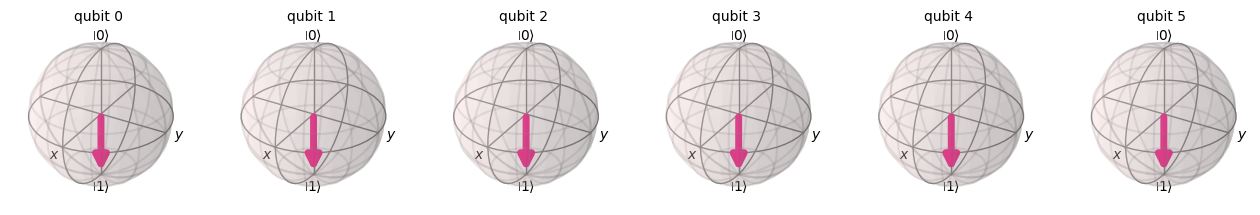

<IPython.core.display.Latex object>

In [43]:
def f_qft_dla_dowolnej_liczby(n):
  print(f'QFT dla liczby {n}')
  n_w_zapisie_bit: str = f'{n:b}' # zapis liczby w postaci binarnej
  liczba_bitow = n.bit_length()
  qr_a = QuantumRegister(liczba_bitow, 'a')
  qr_b = QuantumRegister(liczba_bitow, 'b')

  wires_a = range(liczba_bitow)
  wires_b = range(liczba_bitow, 2*liczba_bitow)

  qc_a = QuantumCircuit(qr_a)

  for n_digit, digit in enumerate(n_w_zapisie_bit[::-1]):
    if digit == '1':
      qc_a.x(n_digit)

  qc_b = QuantumCircuit(qr_b)
  for i in range(liczba_bitow):
    qc_b.h(i)

  qc = QuantumCircuit(qr_a, qr_b)
  qc = qc.compose(qc_a, wires_a)
  qc = qc.compose(qc_b, wires_b)
  # display(qc.draw())

  for liczba in range(liczba_bitow):
    for n_bit in range(liczba_bitow):
      qc.crz((2 * 2**liczba  * np.pi) / 2**(liczba_bitow-n_bit), liczba, liczba_bitow+n_bit)
    qc.barrier()

  qc = qc.compose(QFT(liczba_bitow).inverse(), wires_b)
  display(qc.draw())
  ψ = qi.Statevector(qc)
  display(ψ.draw('Bloch'))
  display(ψ.draw('latex'))

f_qft_dla_dowolnej_liczby(4)
f_qft_dla_dowolnej_liczby(5)
f_qft_dla_dowolnej_liczby(6)
f_qft_dla_dowolnej_liczby(7)

## Dodawanie dwóch liczb, niekoniecznie o równej liczbie kubitów

a_0: ─────────────
     ┌───┐        
a_1: ┤ X ├────────
     └───┘        
a_2: ─────────────
     ┌───┐┌──────┐
b_0: ┤ X ├┤0     ├
     └───┘│      │
b_1: ─────┤1     ├
     ┌───┐│  QFT │
b_2: ┤ X ├┤2     ├
     └───┘│      │
b_3: ─────┤3     ├
          └──────┘

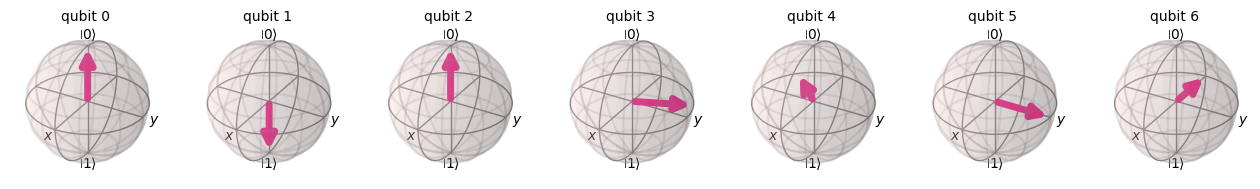

<IPython.core.display.Latex object>

░            »
a_0: ──────────────────■──────────■──────────■─────────■─────░────────────»
     ┌───┐             │          │          │         │     ░            »
a_1: ┤ X ├─────────────┼──────────┼──────────┼─────────┼─────░──────■─────»
     └───┘             │          │          │         │     ░      │     »
a_2: ──────────────────┼──────────┼──────────┼─────────┼─────░──────┼─────»
     ┌───┐┌──────┐┌────┴────┐     │          │         │     ░ ┌────┴────┐»
b_0: ┤ X ├┤0     ├┤ Rz(π/8) ├─────┼──────────┼─────────┼─────░─┤ Rz(π/4) ├»
     └───┘│      │└─────────┘┌────┴────┐     │         │     ░ └─────────┘»
b_1: ─────┤1     ├───────────┤ Rz(π/4) ├─────┼─────────┼─────░────────────»
     ┌───┐│  QFT │           └─────────┘┌────┴────┐    │     ░            »
b_2: ┤ X ├┤2     ├──────────────────────┤ Rz(π/2) ├────┼─────░────────────»
     └───┘│      │                      └─────────┘┌───┴───┐ ░            »
b_3: ─────┤3     ├─────────────────────────────────┤ Rz(π) ├─░────────────»
          └──────┘                                 └───────┘ ░            »
«                                    ░                                         »
«a_0: ───────────────────────────────░─────────────────────────────────────────»
«                                    ░                                         »
«a_1: ─────■─────────■────────■──────░─────────────────────────────────────────»
«          │         │        │      ░                                         »
«a_2: ─────┼─────────┼────────┼──────░──────■─────────■────────■─────────■─────»
«          │         │        │      ░ ┌────┴────┐    │        │         │     »
«b_0: ─────┼─────────┼────────┼──────░─┤ Rz(π/2) ├────┼────────┼─────────┼─────»
«     ┌────┴────┐    │        │      ░ └─────────┘┌───┴───┐    │         │     »
«b_1: ┤ Rz(π/2) ├────┼────────┼──────░────────────┤ Rz(π) ├────┼─────────┼─────»
«     └─────────┘┌───┴───┐    │      ░            └───────┘┌───┴────┐    │     »
«b_2: ───────────┤ Rz(π) ├────┼──────░─────────────────────┤ Rz(2π) ├────┼─────»
«                └───────┘┌───┴────┐ ░                     └────────┘┌───┴────┐»
«b_3: ────────────────────┤ Rz(2π) ├─░───────────────────────────────┤ Rz(4π) ├»
«                         └────────┘ ░                               └────────┘»
«      ░ 
«a_0: ─░─
«      ░ 
«a_1: ─░─
«      ░ 
«a_2: ─░─
«      ░ 
«b_0: ─░─
«      ░ 
«b_1: ─░─
«      ░ 
«b_2: ─░─
«      ░ 
«b_3: ─░─
«      ░

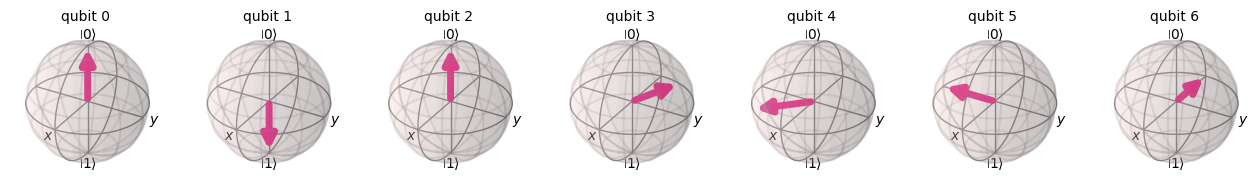

<IPython.core.display.Latex object>

░            »
a_0: ──────────────────■──────────■──────────■─────────■─────░────────────»
     ┌───┐             │          │          │         │     ░            »
a_1: ┤ X ├─────────────┼──────────┼──────────┼─────────┼─────░──────■─────»
     └───┘             │          │          │         │     ░      │     »
a_2: ──────────────────┼──────────┼──────────┼─────────┼─────░──────┼─────»
     ┌───┐┌──────┐┌────┴────┐     │          │         │     ░ ┌────┴────┐»
b_0: ┤ X ├┤0     ├┤ Rz(π/8) ├─────┼──────────┼─────────┼─────░─┤ Rz(π/4) ├»
     └───┘│      │└─────────┘┌────┴────┐     │         │     ░ └─────────┘»
b_1: ─────┤1     ├───────────┤ Rz(π/4) ├─────┼─────────┼─────░────────────»
     ┌───┐│  QFT │           └─────────┘┌────┴────┐    │     ░            »
b_2: ┤ X ├┤2     ├──────────────────────┤ Rz(π/2) ├────┼─────░────────────»
     └───┘│      │                      └─────────┘┌───┴───┐ ░            »
b_3: ─────┤3     ├─────────────────────────────────┤ Rz(π) ├─░────────────»
          └──────┘                                 └───────┘ ░            »
«                                    ░                                         »
«a_0: ───────────────────────────────░─────────────────────────────────────────»
«                                    ░                                         »
«a_1: ─────■─────────■────────■──────░─────────────────────────────────────────»
«          │         │        │      ░                                         »
«a_2: ─────┼─────────┼────────┼──────░──────■─────────■────────■─────────■─────»
«          │         │        │      ░ ┌────┴────┐    │        │         │     »
«b_0: ─────┼─────────┼────────┼──────░─┤ Rz(π/2) ├────┼────────┼─────────┼─────»
«     ┌────┴────┐    │        │      ░ └─────────┘┌───┴───┐    │         │     »
«b_1: ┤ Rz(π/2) ├────┼────────┼──────░────────────┤ Rz(π) ├────┼─────────┼─────»
«     └─────────┘┌───┴───┐    │      ░            └───────┘┌───┴────┐    │     »
«b_2: ───────────┤ Rz(π) ├────┼──────░─────────────────────┤ Rz(2π) ├────┼─────»
«                └───────┘┌───┴────┐ ░                     └────────┘┌───┴────┐»
«b_3: ────────────────────┤ Rz(2π) ├─░───────────────────────────────┤ Rz(4π) ├»
«                         └────────┘ ░                               └────────┘»
«      ░          
«a_0: ─░──────────
«      ░          
«a_1: ─░──────────
«      ░          
«a_2: ─░──────────
«      ░ ┌───────┐
«b_0: ─░─┤0      ├
«      ░ │       │
«b_1: ─░─┤1      ├
«      ░ │  IQFT │
«b_2: ─░─┤2      ├
«      ░ │       │
«b_3: ─░─┤3      ├
«      ░ └───────┘

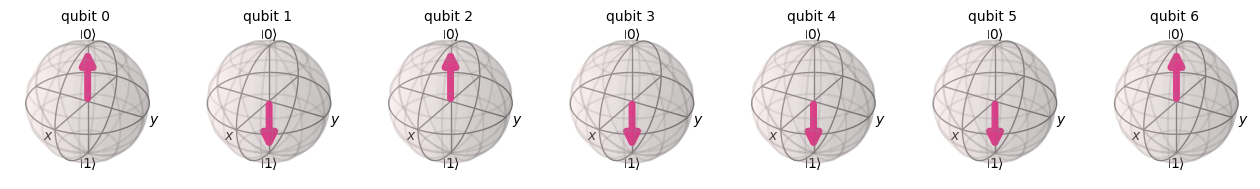

<IPython.core.display.Latex object>

Wynik dodawania to 7


a_0: ─────────────
                  
a_1: ─────────────
     ┌───┐        
a_2: ┤ X ├────────
     └───┘        
a_3: ─────────────
          ┌──────┐
b_0: ─────┤0     ├
          │      │
b_1: ─────┤1     ├
     ┌───┐│      │
b_2: ┤ X ├┤2 QFT ├
     ├───┤│      │
b_3: ┤ X ├┤3     ├
     └───┘│      │
b_4: ─────┤4     ├
          └──────┘

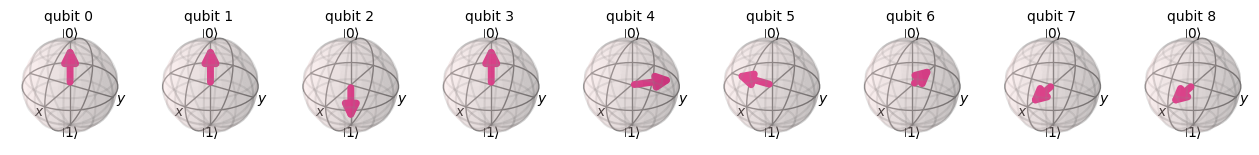

<IPython.core.display.Latex object>

░ »
a_0: ──────────────────■───────────■──────────■──────────■─────────■─────░─»
                       │           │          │          │         │     ░ »
a_1: ──────────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
     ┌───┐             │           │          │          │         │     ░ »
a_2: ┤ X ├─────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
     └───┘             │           │          │          │         │     ░ »
a_3: ──────────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
          ┌──────┐┌────┴─────┐     │          │          │         │     ░ »
b_0: ─────┤0     ├┤ Rz(π/16) ├─────┼──────────┼──────────┼─────────┼─────░─»
          │      │└──────────┘┌────┴────┐     │          │         │     ░ »
b_1: ─────┤1     ├────────────┤ Rz(π/8) ├─────┼──────────┼─────────┼─────░─»
     ┌───┐│      │            └─────────┘┌────┴────┐     │         │     ░ »
b_2: ┤ X ├┤2 QFT ├───────────────────────┤ Rz(π/4) ├─────┼─────────┼─────░─»
     ├───┤│      │                       └─────────┘┌────┴────┐    │     ░ »
b_3: ┤ X ├┤3     ├──────────────────────────────────┤ Rz(π/2) ├────┼─────░─»
     └───┘│      │                                  └─────────┘┌───┴───┐ ░ »
b_4: ─────┤4     ├─────────────────────────────────────────────┤ Rz(π) ├─░─»
          └──────┘                                             └───────┘ ░ »
«                                                          ░            »
«a_0: ─────────────────────────────────────────────────────░────────────»
«                                                          ░            »
«a_1: ─────■──────────■──────────■─────────■────────■──────░────────────»
«          │          │          │         │        │      ░            »
«a_2: ─────┼──────────┼──────────┼─────────┼────────┼──────░──────■─────»
«          │          │          │         │        │      ░      │     »
«a_3: ─────┼──────────┼──────────┼─────────┼────────┼──────░──────┼─────»
«     ┌────┴────┐     │          │         │        │      ░ ┌────┴────┐»
«b_0: ┤ Rz(π/8) ├─────┼──────────┼─────────┼────────┼──────░─┤ Rz(π/4) ├»
«     └─────────┘┌────┴────┐     │         │        │      ░ └─────────┘»
«b_1: ───────────┤ Rz(π/4) ├─────┼─────────┼────────┼──────░────────────»
«                └─────────┘┌────┴────┐    │        │      ░            »
«b_2: ──────────────────────┤ Rz(π/2) ├────┼────────┼──────░────────────»
«                           └─────────┘┌───┴───┐    │      ░            »
«b_3: ─────────────────────────────────┤ Rz(π) ├────┼──────░────────────»
«                                      └───────┘┌───┴────┐ ░            »
«b_4: ──────────────────────────────────────────┤ Rz(2π) ├─░────────────»
«                                               └────────┘ ░            »
«                                              ░                               »
«a_0: ─────────────────────────────────────────░───────────────────────────────»
«                                              ░                               »
«a_1: ─────────────────────────────────────────░───────────────────────────────»
«                                              ░                               »
«a_2: ─────■─────────■────────■─────────■──────░───────────────────────────────»
«          │         │        │         │      ░                               »
«a_3: ─────┼─────────┼────────┼─────────┼──────░──────■─────────■────────■─────»
«          │         │        │         │      ░ ┌────┴────┐    │        │     »
«b_0: ─────┼─────────┼────────┼─────────┼──────░─┤ Rz(π/2) ├────┼────────┼─────»
«     ┌────┴────┐    │        │         │      ░ └─────────┘┌───┴───┐    │     »
«b_1: ┤ Rz(π/2) ├────┼────────┼─────────┼──────░────────────┤ Rz(π) ├────┼─────»
«     └─────────┘┌───┴───┐    │         │      ░            └───────┘┌───┴────┐»
«b_2: ───────────┤ Rz(π) ├────┼─────────┼──────░─────────────────────┤ Rz(2π) ├»
«                └───────┘┌───┴────┐    │      ░                     └

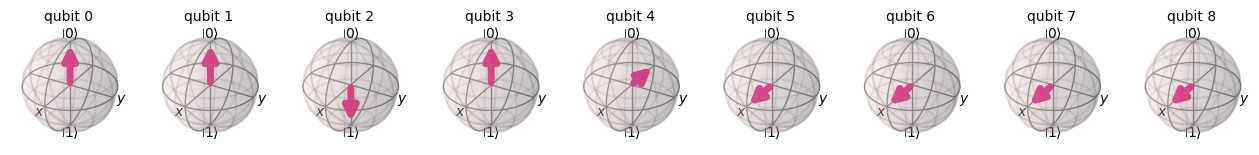

<IPython.core.display.Latex object>

░ »
a_0: ──────────────────■───────────■──────────■──────────■─────────■─────░─»
                       │           │          │          │         │     ░ »
a_1: ──────────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
     ┌───┐             │           │          │          │         │     ░ »
a_2: ┤ X ├─────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
     └───┘             │           │          │          │         │     ░ »
a_3: ──────────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
          ┌──────┐┌────┴─────┐     │          │          │         │     ░ »
b_0: ─────┤0     ├┤ Rz(π/16) ├─────┼──────────┼──────────┼─────────┼─────░─»
          │      │└──────────┘┌────┴────┐     │          │         │     ░ »
b_1: ─────┤1     ├────────────┤ Rz(π/8) ├─────┼──────────┼─────────┼─────░─»
     ┌───┐│      │            └─────────┘┌────┴────┐     │         │     ░ »
b_2: ┤ X ├┤2 QFT ├───────────────────────┤ Rz(π/4) ├─────┼─────────┼─────░─»
     ├───┤│      │                       └─────────┘┌────┴────┐    │     ░ »
b_3: ┤ X ├┤3     ├──────────────────────────────────┤ Rz(π/2) ├────┼─────░─»
     └───┘│      │                                  └─────────┘┌───┴───┐ ░ »
b_4: ─────┤4     ├─────────────────────────────────────────────┤ Rz(π) ├─░─»
          └──────┘                                             └───────┘ ░ »
«                                                          ░            »
«a_0: ─────────────────────────────────────────────────────░────────────»
«                                                          ░            »
«a_1: ─────■──────────■──────────■─────────■────────■──────░────────────»
«          │          │          │         │        │      ░            »
«a_2: ─────┼──────────┼──────────┼─────────┼────────┼──────░──────■─────»
«          │          │          │         │        │      ░      │     »
«a_3: ─────┼──────────┼──────────┼─────────┼────────┼──────░──────┼─────»
«     ┌────┴────┐     │          │         │        │      ░ ┌────┴────┐»
«b_0: ┤ Rz(π/8) ├─────┼──────────┼─────────┼────────┼──────░─┤ Rz(π/4) ├»
«     └─────────┘┌────┴────┐     │         │        │      ░ └─────────┘»
«b_1: ───────────┤ Rz(π/4) ├─────┼─────────┼────────┼──────░────────────»
«                └─────────┘┌────┴────┐    │        │      ░            »
«b_2: ──────────────────────┤ Rz(π/2) ├────┼────────┼──────░────────────»
«                           └─────────┘┌───┴───┐    │      ░            »
«b_3: ─────────────────────────────────┤ Rz(π) ├────┼──────░────────────»
«                                      └───────┘┌───┴────┐ ░            »
«b_4: ──────────────────────────────────────────┤ Rz(2π) ├─░────────────»
«                                               └────────┘ ░            »
«                                              ░                               »
«a_0: ─────────────────────────────────────────░───────────────────────────────»
«                                              ░                               »
«a_1: ─────────────────────────────────────────░───────────────────────────────»
«                                              ░                               »
«a_2: ─────■─────────■────────■─────────■──────░───────────────────────────────»
«          │         │        │         │      ░                               »
«a_3: ─────┼─────────┼────────┼─────────┼──────░──────■─────────■────────■─────»
«          │         │        │         │      ░ ┌────┴────┐    │        │     »
«b_0: ─────┼─────────┼────────┼─────────┼──────░─┤ Rz(π/2) ├────┼────────┼─────»
«     ┌────┴────┐    │        │         │      ░ └─────────┘┌───┴───┐    │     »
«b_1: ┤ Rz(π/2) ├────┼────────┼─────────┼──────░────────────┤ Rz(π) ├────┼─────»
«     └─────────┘┌───┴───┐    │         │      ░            └───────┘┌───┴────┐»
«b_2: ───────────┤ Rz(π) ├────┼─────────┼──────░─────────────────────┤ Rz(2π) ├»
«                └───────┘┌───┴────┐    │      ░                     └

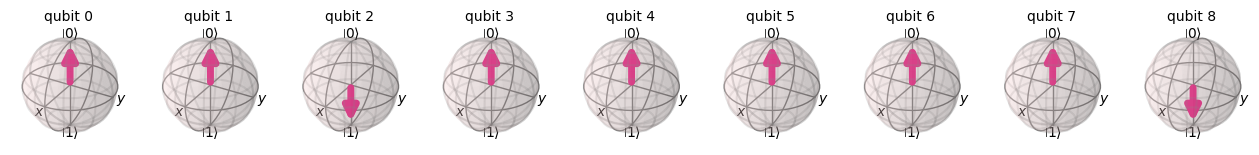

<IPython.core.display.Latex object>

Wynik dodawania to 16


┌───┐        
a_0: ┤ X ├────────
     ├───┤        
a_1: ┤ X ├────────
     ├───┤        
a_2: ┤ X ├────────
     └───┘        
a_3: ─────────────
          ┌──────┐
b_0: ─────┤0     ├
          │      │
b_1: ─────┤1     ├
     ┌───┐│      │
b_2: ┤ X ├┤2 QFT ├
     ├───┤│      │
b_3: ┤ X ├┤3     ├
     └───┘│      │
b_4: ─────┤4     ├
          └──────┘

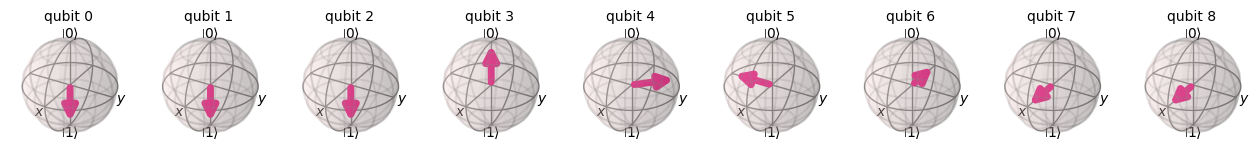

<IPython.core.display.Latex object>

┌───┐                                                               ░ »
a_0: ┤ X ├─────────────■───────────■──────────■──────────■─────────■─────░─»
     ├───┤             │           │          │          │         │     ░ »
a_1: ┤ X ├─────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
     ├───┤             │           │          │          │         │     ░ »
a_2: ┤ X ├─────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
     └───┘             │           │          │          │         │     ░ »
a_3: ──────────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
          ┌──────┐┌────┴─────┐     │          │          │         │     ░ »
b_0: ─────┤0     ├┤ Rz(π/16) ├─────┼──────────┼──────────┼─────────┼─────░─»
          │      │└──────────┘┌────┴────┐     │          │         │     ░ »
b_1: ─────┤1     ├────────────┤ Rz(π/8) ├─────┼──────────┼─────────┼─────░─»
     ┌───┐│      │            └─────────┘┌────┴────┐     │         │     ░ »
b_2: ┤ X ├┤2 QFT ├───────────────────────┤ Rz(π/4) ├─────┼─────────┼─────░─»
     ├───┤│      │                       └─────────┘┌────┴────┐    │     ░ »
b_3: ┤ X ├┤3     ├──────────────────────────────────┤ Rz(π/2) ├────┼─────░─»
     └───┘│      │                                  └─────────┘┌───┴───┐ ░ »
b_4: ─────┤4     ├─────────────────────────────────────────────┤ Rz(π) ├─░─»
          └──────┘                                             └───────┘ ░ »
«                                                          ░            »
«a_0: ─────────────────────────────────────────────────────░────────────»
«                                                          ░            »
«a_1: ─────■──────────■──────────■─────────■────────■──────░────────────»
«          │          │          │         │        │      ░            »
«a_2: ─────┼──────────┼──────────┼─────────┼────────┼──────░──────■─────»
«          │          │          │         │        │      ░      │     »
«a_3: ─────┼──────────┼──────────┼─────────┼────────┼──────░──────┼─────»
«     ┌────┴────┐     │          │         │        │      ░ ┌────┴────┐»
«b_0: ┤ Rz(π/8) ├─────┼──────────┼─────────┼────────┼──────░─┤ Rz(π/4) ├»
«     └─────────┘┌────┴────┐     │         │        │      ░ └─────────┘»
«b_1: ───────────┤ Rz(π/4) ├─────┼─────────┼────────┼──────░────────────»
«                └─────────┘┌────┴────┐    │        │      ░            »
«b_2: ──────────────────────┤ Rz(π/2) ├────┼────────┼──────░────────────»
«                           └─────────┘┌───┴───┐    │      ░            »
«b_3: ─────────────────────────────────┤ Rz(π) ├────┼──────░────────────»
«                                      └───────┘┌───┴────┐ ░            »
«b_4: ──────────────────────────────────────────┤ Rz(2π) ├─░────────────»
«                                               └────────┘ ░            »
«                                              ░                               »
«a_0: ─────────────────────────────────────────░───────────────────────────────»
«                                              ░                               »
«a_1: ─────────────────────────────────────────░───────────────────────────────»
«                                              ░                               »
«a_2: ─────■─────────■────────■─────────■──────░───────────────────────────────»
«          │         │        │         │      ░                               »
«a_3: ─────┼─────────┼────────┼─────────┼──────░──────■─────────■────────■─────»
«          │         │        │         │      ░ ┌────┴────┐    │        │     »
«b_0: ─────┼─────────┼────────┼─────────┼──────░─┤ Rz(π/2) ├────┼────────┼─────»
«     ┌────┴────┐    │        │         │      ░ └─────────┘┌───┴───┐    │     »
«b_1: ┤ Rz(π/2) ├────┼────────┼─────────┼──────░────────────┤ Rz(π) ├────┼─────»
«     └─────────┘┌───┴───┐    │         │      ░            └───────┘┌───┴────┐»
«b_2: ───────────┤ Rz(π) ├────┼─────────┼──────░─────────────────────┤ Rz(2π) ├»
« 

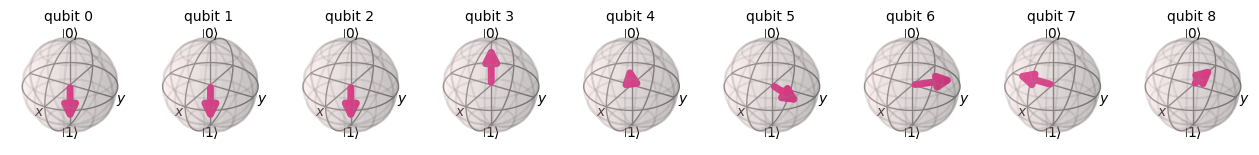

<IPython.core.display.Latex object>

┌───┐                                                               ░ »
a_0: ┤ X ├─────────────■───────────■──────────■──────────■─────────■─────░─»
     ├───┤             │           │          │          │         │     ░ »
a_1: ┤ X ├─────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
     ├───┤             │           │          │          │         │     ░ »
a_2: ┤ X ├─────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
     └───┘             │           │          │          │         │     ░ »
a_3: ──────────────────┼───────────┼──────────┼──────────┼─────────┼─────░─»
          ┌──────┐┌────┴─────┐     │          │          │         │     ░ »
b_0: ─────┤0     ├┤ Rz(π/16) ├─────┼──────────┼──────────┼─────────┼─────░─»
          │      │└──────────┘┌────┴────┐     │          │         │     ░ »
b_1: ─────┤1     ├────────────┤ Rz(π/8) ├─────┼──────────┼─────────┼─────░─»
     ┌───┐│      │            └─────────┘┌────┴────┐     │         │     ░ »
b_2: ┤ X ├┤2 QFT ├───────────────────────┤ Rz(π/4) ├─────┼─────────┼─────░─»
     ├───┤│      │                       └─────────┘┌────┴────┐    │     ░ »
b_3: ┤ X ├┤3     ├──────────────────────────────────┤ Rz(π/2) ├────┼─────░─»
     └───┘│      │                                  └─────────┘┌───┴───┐ ░ »
b_4: ─────┤4     ├─────────────────────────────────────────────┤ Rz(π) ├─░─»
          └──────┘                                             └───────┘ ░ »
«                                                          ░            »
«a_0: ─────────────────────────────────────────────────────░────────────»
«                                                          ░            »
«a_1: ─────■──────────■──────────■─────────■────────■──────░────────────»
«          │          │          │         │        │      ░            »
«a_2: ─────┼──────────┼──────────┼─────────┼────────┼──────░──────■─────»
«          │          │          │         │        │      ░      │     »
«a_3: ─────┼──────────┼──────────┼─────────┼────────┼──────░──────┼─────»
«     ┌────┴────┐     │          │         │        │      ░ ┌────┴────┐»
«b_0: ┤ Rz(π/8) ├─────┼──────────┼─────────┼────────┼──────░─┤ Rz(π/4) ├»
«     └─────────┘┌────┴────┐     │         │        │      ░ └─────────┘»
«b_1: ───────────┤ Rz(π/4) ├─────┼─────────┼────────┼──────░────────────»
«                └─────────┘┌────┴────┐    │        │      ░            »
«b_2: ──────────────────────┤ Rz(π/2) ├────┼────────┼──────░────────────»
«                           └─────────┘┌───┴───┐    │      ░            »
«b_3: ─────────────────────────────────┤ Rz(π) ├────┼──────░────────────»
«                                      └───────┘┌───┴────┐ ░            »
«b_4: ──────────────────────────────────────────┤ Rz(2π) ├─░────────────»
«                                               └────────┘ ░            »
«                                              ░                               »
«a_0: ─────────────────────────────────────────░───────────────────────────────»
«                                              ░                               »
«a_1: ─────────────────────────────────────────░───────────────────────────────»
«                                              ░                               »
«a_2: ─────■─────────■────────■─────────■──────░───────────────────────────────»
«          │         │        │         │      ░                               »
«a_3: ─────┼─────────┼────────┼─────────┼──────░──────■─────────■────────■─────»
«          │         │        │         │      ░ ┌────┴────┐    │        │     »
«b_0: ─────┼─────────┼────────┼─────────┼──────░─┤ Rz(π/2) ├────┼────────┼─────»
«     ┌────┴────┐    │        │         │      ░ └─────────┘┌───┴───┐    │     »
«b_1: ┤ Rz(π/2) ├────┼────────┼─────────┼──────░────────────┤ Rz(π) ├────┼─────»
«     └─────────┘┌───┴───┐    │         │      ░            └───────┘┌───┴────┐»
«b_2: ───────────┤ Rz(π) ├────┼─────────┼──────░─────────────────────┤ Rz(2π) ├»
« 

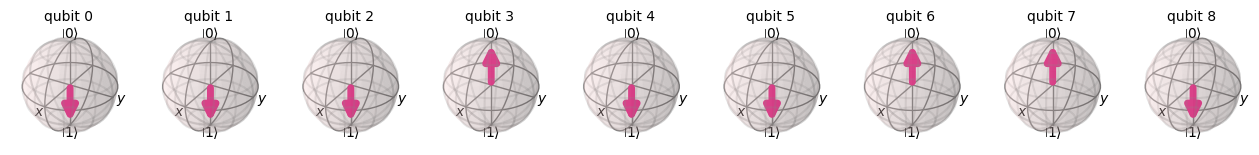

<IPython.core.display.Latex object>

Wynik dodawania to 19


In [105]:
def f_dodaj_dwie_liczby(liczba1, liczba2):
  liczba_bitow1 = liczba1.bit_length()
  liczba_bitow2 = liczba2.bit_length()

  if liczba_bitow1 > liczba_bitow2:
    liczba_bitow = liczba_bitow1 + 1
    a = liczba2
    b = liczba1
  elif liczba_bitow1 < liczba_bitow2:
    liczba_bitow = liczba_bitow2 + 1
    a = liczba1
    b = liczba2
  else:
    liczba_bitow = liczba_bitow2 + 1
    a = liczba1
    b = liczba2

  a_length = a.bit_length() + 1

  qr_a = QuantumRegister(a_length, 'a')
  qr_b = QuantumRegister(liczba_bitow, 'b')

  wires_a = range(a_length)
  wires_b = range(a_length, a_length +liczba_bitow)

  a_bit = f'{a:b}'.zfill(a_length)
  qc_a = QuantumCircuit(qr_a)
  for n_digit, digit in enumerate(a_bit[::-1]):
    if digit == '1':
      qc_a.x(n_digit)

  b_bit = f'{b:b}'.zfill(liczba_bitow)
  qc_b = QuantumCircuit(qr_b)
  for n_digit, digit in enumerate(b_bit[::-1]):
    if digit == '1':
      qc_b.x(n_digit)
  qc_b = qc_b.compose(QFT(liczba_bitow))


  qc = QuantumCircuit(qr_a, qr_b)
  qc = qc.compose(qc_a, wires_a)
  qc = qc.compose(qc_b, wires_b)

  display(qc.draw())
  ψ = qi.Statevector(qc)
  display(ψ.draw('Bloch'))
  display(ψ.draw('latex'))

  for liczba in range(a_length):
      for n_bit in range(liczba_bitow):
        qc.crz((2 * (2**liczba)  * np.pi) / 2**(liczba_bitow-n_bit), liczba, a_length+n_bit)
      qc.barrier()
  display(qc.draw())
  ψ = qi.Statevector(qc)
  display(ψ.draw('Bloch'))
  display(ψ.draw('latex'))


  qc = qc.compose(QFT(liczba_bitow).inverse(), wires_b)
  display(qc.draw())
  ψ = qi.Statevector(qc)
  display(ψ.draw('Bloch'))
  display(ψ.draw('latex'))

  dic_out = dict(ψ.sample_counts(1))
  print(f'Wynik dodawania to {int(tuple(dic_out)[0][:liczba_bitow],2)}')

f_dodaj_dwie_liczby(2,5)
f_dodaj_dwie_liczby(4,12)
f_dodaj_dwie_liczby(7,12)


## Obwód z pomiarem

In [106]:
def f_obwod_dla_sumy_z_pomiarem(liczba1, liczba2):
  liczba_bitow1 = liczba1.bit_length()
  liczba_bitow2 = liczba2.bit_length()

  if liczba_bitow1 > liczba_bitow2:
    liczba_bitow = liczba_bitow1 + 1
    a = liczba2
    b = liczba1
  elif liczba_bitow1 < liczba_bitow2:
    liczba_bitow = liczba_bitow2 + 1
    a = liczba1
    b = liczba2
  else:
    liczba_bitow = liczba_bitow2 + 1
    a = liczba1
    b = liczba2

  a_length = a.bit_length() + 1

  qr_a = QuantumRegister(a_length, 'a')
  qr_b = QuantumRegister(liczba_bitow, 'b')
  cr = ClassicalRegister(liczba_bitow)

  wires_a = range(a_length)
  wires_b = range(a_length, a_length +liczba_bitow)

  a_bit = f'{a:b}'.zfill(a_length)
  qc_a = QuantumCircuit(qr_a)
  for n_digit, digit in enumerate(a_bit[::-1]):
    if digit == '1':
      qc_a.x(n_digit)

  b_bit = f'{b:b}'.zfill(liczba_bitow)
  qc_b = QuantumCircuit(qr_b)
  for n_digit, digit in enumerate(b_bit[::-1]):
    if digit == '1':
      qc_b.x(n_digit)
  qc_b = qc_b.compose(QFT(liczba_bitow))


  qc = QuantumCircuit(qr_a, qr_b)
  qc = qc.compose(qc_a, wires_a)
  qc = qc.compose(qc_b, wires_b)
  qc.add_register(cr)

  for liczba in range(a_length):
      for n_bit in range(liczba_bitow):
        qc.crz((2 * (2**liczba)  * np.pi) / 2**(liczba_bitow-n_bit), liczba, a_length+n_bit)
      qc.barrier()
  qc = qc.compose(QFT(liczba_bitow).inverse(), wires_b)
  qc.measure(wires_b, range(liczba_bitow))
  return qc



### Basic simulator

In [109]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile

In [110]:
qc = f_obwod_dla_sumy_z_pomiarem(7, 12)
# qc.draw()
simulator_basic = BasicSimulator()
qc_t = transpile(qc, backend = simulator_basic)
qc_t.draw()

job = simulator_basic.run(qc_t, shots = 10_000, memory= False)
result = job.result()
counts = result.get_counts()
print(counts)
plot_distribution(counts)

{'10011': 10000}


In [111]:
counts_new2 = {int(k,2):v for k, v in counts.items()}
plot_distribution(counts_new2)

### Aer

In [115]:
from qiskit_aer import AerSimulator
simulator_aer = AerSimulator()

qc_aer = transpile(qc, backend = simulator_aer)
result = simulator_aer.run(qc_aer, ).result()

In [116]:
counts = result.get_counts()
print(counts)
plot_distribution(counts)

{'10011': 1024}


### FakeProvider

In [126]:
from qiskit.providers.fake_provider import Fake27QPulseV1,Fake20QV1

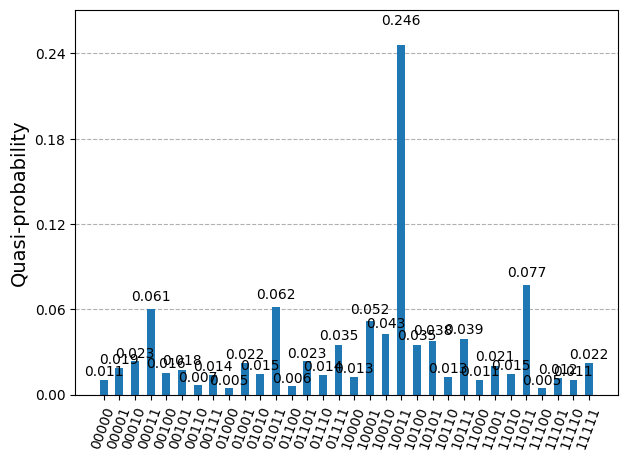

In [123]:
# Get a fake backend from the fake provider
backend = Fake27QPulseV1()
qc_fake = transpile(qc, backend)
job = backend.run(qc_fake)
counts = job.result().get_counts()
plot_distribution(counts)

In [127]:
# Get a fake backend from the fake provider
backend = Fake20QV1()
qc_fake = transpile(qc, backend)
job = backend.run(qc_fake)
counts = job.result().get_counts()
plot_distribution(counts)

# Do Opracowania

In [ ]:
qc = QuantumCircuit(4)
qc.x(1) #2
qc.x([2]) #3
qc.append(DraperQFTAdder(2, kind='fixed'), [0,1,2,3])
display(qc.draw())




simulator_basic = BasicSimulator()
qc_t = transpile(qc, backend = simulator_basic)
qc_t.measure_all()



job = simulator_basic.run(qc_t, shots = 1000, memory= False)
result = job.result()
counts = result.get_counts()
print(counts)
plot_distribution(counts)

max_key = max(counts, key=counts.get)
print(max_key)
liczba_bin = max_key[:2]
print(liczba_bin)
print(f'Tradycyjnie: {int(liczba_bin,2)}, wstecz: {int(liczba_bin[::-1],2)}')

┌─────────────────┐
q_0: ─────┤0                ├
     ┌───┐│                 │
q_1: ┤ X ├┤1                ├
     ├───┤│  DraperQFTAdder │
q_2: ┤ X ├┤2                ├
     └───┘│                 │
q_3: ─────┤3                ├
          └─────────────────┘

{'1110': 1000}
1110
11
Tradycyjnie: 3, wstecz: 3


In [ ]:
def f_drapper_test(a,b):
  a_bin = f'{a:b}'
  b_bin = f'{b:b}'
  bin_len_max = max(len(a_bin), len(b_bin))
  a_bin_full_len = a_bin.zfill(bin_len_max)
  b_bin_full_len = b_bin.zfill(bin_len_max)
  print(f'a: {a_bin_full_len}, b:{b_bin_full_len}')

  n_wires_tot = bin_len_max * 2 + 1

  qr_a = QuantumRegister(bin_len_max, 'a')
  qr_b = QuantumRegister(bin_len_max, 'b')
  qr_cout = QuantumRegister(1, 'cout') # carry out value

  qc_a = QuantumCircuit(qr_a)
  qc_b = QuantumCircuit(qr_b)

  for n_digit, digit in enumerate(a_bin_full_len[::-1]):
    if digit == '1':
      qc_a.x(n_digit)

  for n_digit, digit in enumerate(b_bin_full_len[::-1]):
    if digit == '1':
      qc_b.x(n_digit)

  wires_1 = range(bin_len_max)
  wires_2 = range(bin_len_max, 2*bin_len_max)
  wires_sum = [2*bin_len_max]

  qc = QuantumCircuit(qr_a, qr_b, qr_cout)
  qc = qc.compose(qc_a, wires_1)
  qc = qc.compose(qc_b, wires_2)

  qc.append(DraperQFTAdder(bin_len_max, kind='half'), range(2*bin_len_max+1))
  display(qc.draw())

  simulator_basic = BasicSimulator()
  qc_t = transpile(qc, backend = simulator_basic)
  qc_t.measure_all()

  job = simulator_basic.run(qc_t, shots = 1000, memory= False)
  result = job.result()
  counts = result.get_counts()
  print(counts)
  plot_distribution(counts)

  max_key = max(counts, key=counts.get)
  print(max_key)
  liczba_bin = max_key[:bin_len_max+1]
  print(liczba_bin)
  print(f'Rozwiązanie: {int(liczba_bin,2)}')
  return int(liczba_bin,2)

f_drapper_test(2,45)
f_drapper_test(10,15)


a: 000010, b:101101


┌──────────────────┐
 a_0: ─────┤0                 ├
      ┌───┐│                  │
 a_1: ┤ X ├┤1                 ├
      └───┘│                  │
 a_2: ─────┤2                 ├
           │                  │
 a_3: ─────┤3                 ├
           │                  │
 a_4: ─────┤4                 ├
           │                  │
 a_5: ─────┤5                 ├
      ┌───┐│                  │
 b_0: ┤ X ├┤6  DraperQFTAdder ├
      └───┘│                  │
 b_1: ─────┤7                 ├
      ┌───┐│                  │
 b_2: ┤ X ├┤8                 ├
      ├───┤│                  │
 b_3: ┤ X ├┤9                 ├
      └───┘│                  │
 b_4: ─────┤10                ├
      ┌───┐│                  │
 b_5: ┤ X ├┤11                ├
      └───┘│                  │
cout: ─────┤12                ├
           └──────────────────┘

{'0101111000010': 1000}
0101111000010
0101111
Rozwiązanie: 47
a: 1010, b:1111


┌─────────────────┐
 a_0: ─────┤0                ├
      ┌───┐│                 │
 a_1: ┤ X ├┤1                ├
      └───┘│                 │
 a_2: ─────┤2                ├
      ┌───┐│                 │
 a_3: ┤ X ├┤3                ├
      ├───┤│                 │
 b_0: ┤ X ├┤4 DraperQFTAdder ├
      ├───┤│                 │
 b_1: ┤ X ├┤5                ├
      ├───┤│                 │
 b_2: ┤ X ├┤6                ├
      ├───┤│                 │
 b_3: ┤ X ├┤7                ├
      └───┘│                 │
cout: ─────┤8                ├
           └─────────────────┘

{'110011010': 1000}
110011010
11001
Rozwiązanie: 25


25

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
simulator_basic = BasicSimulator()

In [ ]:
job = simulator_basic.run(qc, shots = 1, memory= False)
result = job.result()



BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

In [ ]:
from qiskit import transpile
qc_t = transpile(qc, backend = simulator_basic)

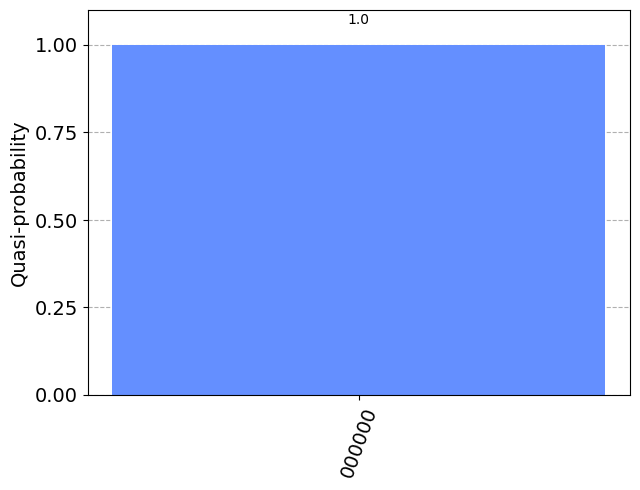

In [ ]:
job = simulator_basic.run(qc_t, shots = 100, memory= True)
result = job.result()
counts = result.get_counts()
samples = result.get_memory()
plot_distribution(counts)

In [ ]:
counts

{'000000': 100}

In [ ]:
max_key = max(counts, key=counts.get)
print(max_key , int(max_key[::-1],2))
z = f'{23:b}'
print(z[::-1])


100011 49
11101


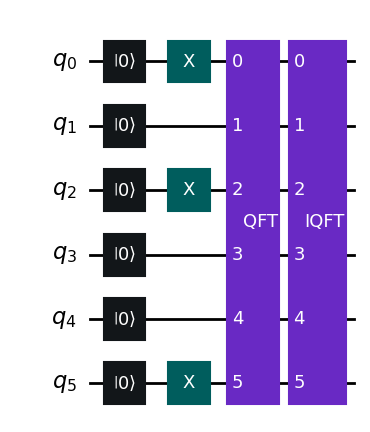

<IPython.core.display.Latex object>

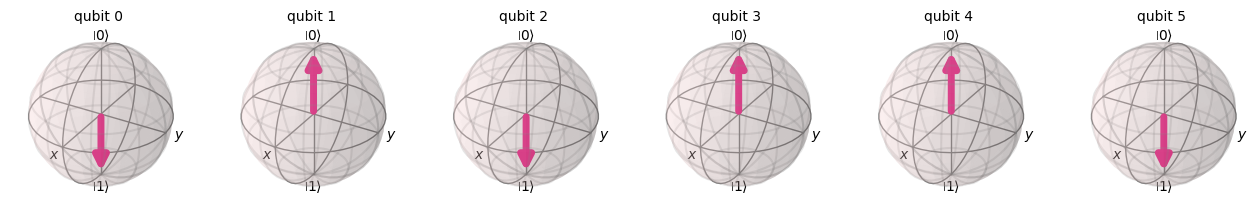

In [16]:
def f_przeksztalc_do_postaci_bazowej(qc):
  qc.append(QFT(qc.num_qubits).inverse(), range(qc.num_qubits))
  display(qc.draw('mpl', style = 'textbook'))
  ψ = qi.Statevector(qc)
  display(ψ.draw('latex'))
  display(ψ.draw('Bloch'))
  return qc

f_przeksztalc_do_postaci_bazowej(qc_37)